# Game Data Exploration and Analysis

### Index
* [Trends in games](#gametrends)
    * [Number of games by year](#gameyear)
    * [Number of games by month](#gamemonth)
    * [Geographical distribution of game developers](#gamedeveloper)
    
* [Factors affecting game ratings](#gamerating)
    * [Timing of Release](#gametiming)
    * [Platforms](#gameplatform)
    * [Genres](#gamegenre)

In [1]:
# dependencies and setup
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
import os
import datetime as dt

#from api_keys import g_key

# Load and read file into dataframe
game_to_load = "csvfiles/game_final.csv"
game_df = pd.read_csv(game_to_load,parse_dates=["release date"])
game_df.head()

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,93,562,6149,2405,455,424,593,9147,5,2015
1,Life is Strange,3439,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,83,466,6156,1916,184,343,124,8196,1,2015
2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,96,404,4230,1261,1143,219,588,6079,10,2018
3,DOOM (2016),2454,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,85,318,4868,1526,319,370,222,6616,5,2016
4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,84,295,4844,1235,225,732,222,6301,11,2015


## Trends in games <a id='gametrends'></a>
The following section explores trends in games released over the past 5 years.


In [2]:
game_df.describe()

,id,number of platforms,number of stores,number of genres,rating,max rating,rating count,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,43046.670034,3.569024,3.132155,2.667508,3.540345,3.803030,190.570707,74.871212,56.936869,696.708754,101.590909,53.954545,55.015993,24.925084,823.224747,6.441919,2016.631313
std,80649.538918,1.833724,1.613510,1.135943,0.569404,0.830094,335.482475,9.587855,74.776647,865.895620,228.029789,110.838428,90.283233,55.423105,1078.106201,3.307467,1.351624
min,2.000000,1.000000,1.000000,1.000000,1.290000,1.000000,5.000000,27.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,2015.000000
25%,3344.250000,2.000000,2.000000,2.000000,3.180000,4.000000,20.000000,70.000000,10.000000,135.750000,6.000000,3.000000,7.000000,1.000000,160.000000,3.000000,2015.000000
50%,13164.000000,3.000000,3.000000,3.000000,3.570000,4.000000,58.500000,76.000000,29.000000,385.500000,22.000000,12.000000,20.000000,5.000000,441.000000,7.000000,2016.000000
75%,45357.500000,5.000000,4.000000,3.000000,3.980000,4.000000,202.250000,81.000000,70.000000,887.500000,84.000000,49.000000,62.250000,22.000000,984.250000,9.000000,2018.000000
max,401808.000000,12.000000,8.000000,7.000000,4.760000,5.000000,3479.000000,97.000000,562.000000,6156.000000,2405.000000,1143.000000,732.000000,593.000000,9147.000000,12.000000,2019.000000


Observations include:
* The range and standard deviation of the Metacritic score data indicate the dataset has high variability.  The mean and median being close together however which indicates the dataset has to be a relatively symmetrical distribution
* The rating has measures of variability of relative magnitude although slightly higher proportionally, which would indicate a slightly more variable dataset.  As with the Metacritic score the mean and median are close


In [3]:
corr = game_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,number of platforms,number of stores,number of genres,rating,max rating,rating count,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
id,1.000000,-0.109314,-0.073723,-0.142900,0.120120,0.104115,-0.085707,0.059424,-0.123683,-0.173915,-0.065115,0.117407,-0.113098,0.007978,-0.153045,0.106714,0.569216
number of platforms,-0.109314,1.000000,0.794889,0.285847,0.023985,0.016134,0.080203,0.042745,0.189957,0.185606,0.045678,-0.026973,0.161130,0.032889,0.160424,-0.004408,-0.114809
number of stores,-0.073723,0.794889,1.000000,0.304836,0.069292,0.048385,0.134550,0.027295,0.271074,0.204458,0.105347,0.092792,0.183129,0.074836,0.190343,0.033249,0.039744
number of genres,-0.142900,0.285847,0.304836,1.000000,-0.146065,-0.124012,-0.089991,-0.061872,-0.027641,-0.013644,-0.108830,-0.089180,-0.025265,-0.063021,-0.037217,-0.034182,-0.107892
rating,0.120120,0.023985,0.069292,-0.146065,1.000000,0.792272,0.369732,0.612237,0.293936,0.208202,0.383698,0.395677,0.216513,0.383812,0.268107,0.043583,0.183956
max rating,0.104115,0.016134,0.048385,-0.124012,0.792272,1.000000,0.274713,0.497492,0.244564,0.164564,0.285163,0.293480,0.156487,0.289921,0.207391,0.030811,0.122187
rating count,-0.085707,0.080203,0.134550,-0.089991,0.369732,0.274713,1.000000,0.365189,0.789389,0.850500,0.934715,0.685489,0.770500,0.814036,0.922640,-0.008194,-0.020281
metacritic score,0.059424,0.042745,0.027295,-0.061872,0.612237,0.497492,0.365189,1.000000,0.346690,0.294205,0.340679,0.338048,0.276339,0.383831,0.328084,0.036040,0.085265
yet,-0.123683,0.189957,0.271074,-0.027641,0.293936,0.244564,0.789389,0.346690,1.000000,0.856972,0.726230,0.598672,0.638108,0.584598,0.871946,-0.027829,-0.059370
owned,-0.173915,0.185606,0.204458,-0.013644,0.208202,0.164564,0.850500,0.294205,0.856972,1.000000,0.714568,0.449403,0.826339,0.608709,0.985594,-0.007845,-0.183080


Running the correlation function to identify relationships between the variables shows a high correlation between number of stores and number of platforms (to be expected).  Also to be expected is the strong correlation between metacritic score and rating

### Number of games by year <a id='gameyear'></a>

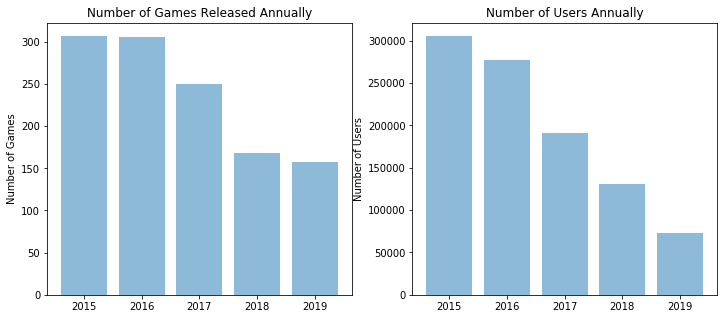

,Annual Number,F Statistic,P Value
0,Games released,270.825969,2.836063e-165
1,Users,13.904115,4.351152e-11


In [35]:
# Create plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

# Generate a bar plot for total released each year
total = game_df.groupby(game_df["year"])["id"].count()

axes[0].set_title("Number of Games Released Annually")
axes[0].set_ylabel("Number of Games")

total = axes[0].bar(total.index, total, alpha=0.5)

# Generate a bar plot for total users each year
users = game_df.groupby(game_df["year"])["users"].sum()

axes[1].set_title("Number of Users Annually")
axes[1].set_ylabel("Number of Users")

users = axes[1].bar(users.index, users, alpha=0.5)

# Assign game count and rating years to variables for ANOVA
group1 = game_df[game_df["year"] == 2015]["id"]
group2 = game_df[game_df["year"] == 2016]["id"]
group3 = game_df[game_df["year"] == 2017]["id"]
group4 = game_df[game_df["year"] == 2018]["id"]
group5 = game_df[game_df["year"] == 2019]["id"]

group6 = game_df[game_df["year"] == 2015]["rating"]
group7 = game_df[game_df["year"] == 2016]["rating"]
group8 = game_df[game_df["year"] == 2017]["rating"]
group9 = game_df[game_df["year"] == 2018]["rating"]
group10 = game_df[game_df["year"] == 2019]["rating"]

# Perform the ANOVA
anova_gc = st.f_oneway(group1, group2, group3, group4, group5)
anova_r = st.f_oneway(group6, group7, group8, group9, group10)

fstats = (anova_gc[0], anova_r[0])
pstats = (anova_gc[1], anova_r[1])
counts = ("Games released", "Users")

plt.show()

# Create and show dataframe
frame = {"Annual Number" : counts,"F Statistic": fstats, "P Value" : pstats} 
summary_df = pd.DataFrame(frame)

summary_df

#plt.savefig("figures/gameusergamenumber_comparisontrend.png")


Whilst both the number of games and annual users are in decline, users numbers are decreasing more rapidly than the number of games released.  The p-values for both datasets suggests that no particular year is driving the results

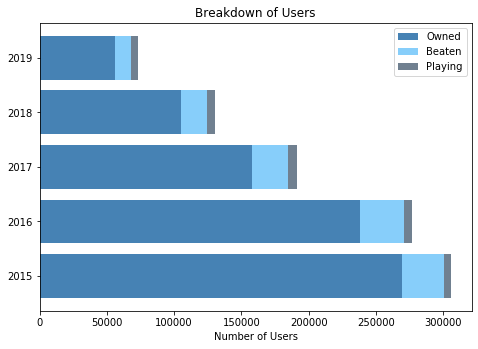

In [5]:
# Generate a stacked bar plot for breakdown of users each year
years = game_df["year"].unique()  # the y locations for the groups
years.sort()

owned = game_df.groupby(game_df["year"]).owned.sum()
beaten = game_df.groupby(game_df["year"]).beaten.sum()
playing = game_df.groupby(game_df["year"]).playing.sum()
b = list(owned + beaten)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(years, owned, color="steelblue")
ax.barh(years, beaten, left=owned, color="lightskyblue")
ax.barh(years, playing, left=b, color="slategrey")


ax.set_xlabel("Number of Users")
ax.set_title("Breakdown of Users")
ax.set_yticks(years, (years[0], years[1], years[2], years[3], years[4]))

ax.legend(labels=["Owned", "Beaten", "Playing"])

plt.savefig("figures/gameuser_annualtrend.png")

Whilst there are 6 user groups in the dataset, 'active' users have been defined as those who own, are currently playing or have beaten the game.  The API does not define the user groups, which is a limiting factor in further interpretation and analysis.  From above, it is clear to see that the year on year drop in user numbers is being driven primarily by less people owning the game


### Number of games by month <a id='gamemonth'></a>

In [40]:
# Monthly spread of games by year

# Declare variables for loop
years = game_df["year"].unique()
years.sort()

months = game_df["month"].unique()
months.sort()

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep","Oct","Nov","Dec"]

# Create empty dataframe 
month_df = pd.DataFrame(0, index=np.arange(len(months)+1), columns=years)

# Populate dataframe
for year in years:  
    current_yr = game_df.loc[game_df["year"] == year]
    month_df[year] = pd.DataFrame(current_yr.groupby(["month"])["id"].count())
    
# Clean up dataframe    
month_df = month_df.dropna()
month_df["month"] = months
month_df = month_df[["month", 2015, 2016, 2017, 2018, 2019]]


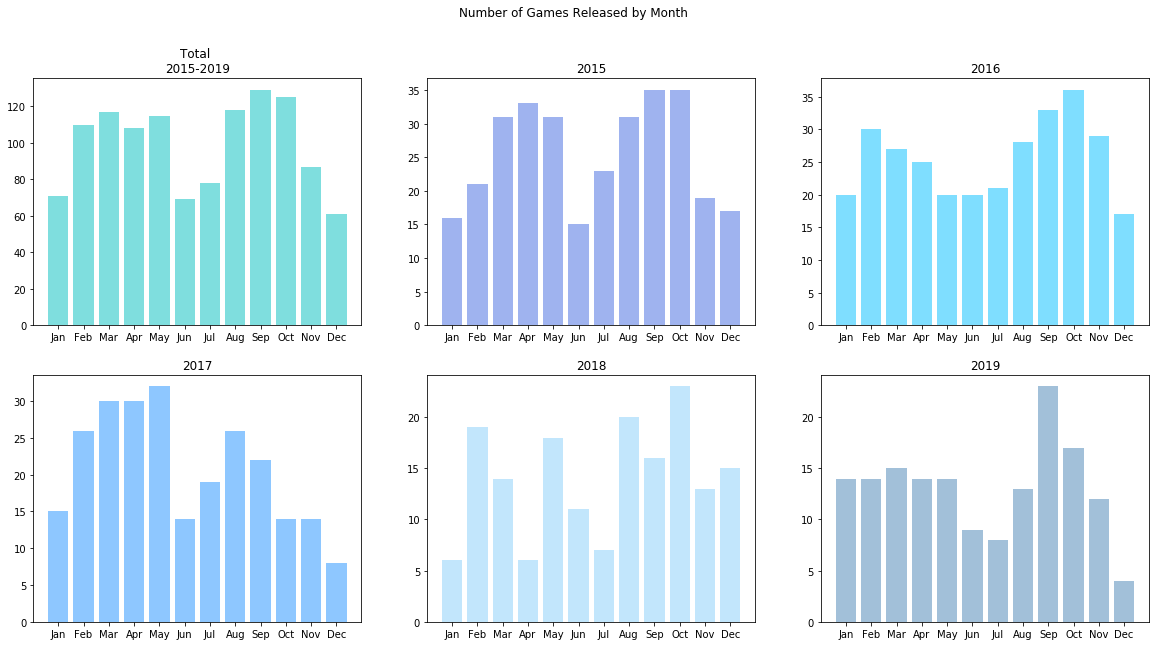

In [42]:
# Create plot
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
fig.suptitle("Number of Games Released by Month")

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep","Oct","Nov","Dec"]

#plt.title("Number of Games Released by Month")
all_years = game_df.groupby(["month"])["id"].count()
barplot0 = axes[0,0].bar(months, all_years, color="c", alpha=0.5)
axes[0,0].set_title('Total \n2015-2019')

year1 = month_df[2015]
barplot1 = axes[0,1].bar(months, year1, color="royalblue", alpha=0.5)
axes[0,1].set_title('2015')

year2 = month_df[2016]
barplot2 = axes[0,2].bar(months, year2, color="deepskyblue", alpha=0.5)
axes[0,2].set_title('2016')

year3 = month_df[2017]
barplot3 = axes[1,0].bar(months, year3, color="dodgerblue", alpha=0.5)
axes[1,0].set_title('2017')

year4 = month_df[2018]
barplot4 = axes[1,1].bar(months, year4, color="lightskyblue", alpha=0.5)
axes[1,1].set_title('2018')

year5 = month_df[2019]
barplot5 = axes[1,2].bar(months, year5, color="steelblue", alpha=0.5)
axes[1,2].set_title('2019')

plt.savefig("figures/game_monthlytrend.png")

The distribution of games across the months shows a significant drop off in the middle of the year (June/July), with a definite increase heading into the end of year (September/October).  As expected, realeases taper off in December, being a major holiday period in many parts of the world

### Geographical distribution of game developers <a id='gamedeveloper'></a>

In [43]:
# load the required developer csv
developer_df=pd.read_csv("csvfiles/developers.csv")

Most listed games on the site have multiple developers and so, in order to perform the analysis, it was assumed that order in the listing was an indication of size of contribution and the first developer listed was 'assumed' to be the primary developer and assigned to the game

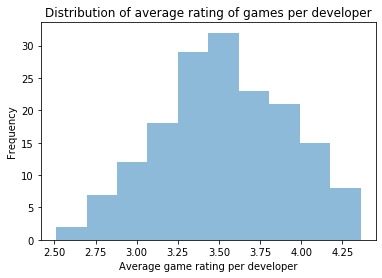

In [48]:
# exploring game ratings by developer
dev_gamecount=pd.DataFrame(developer_df.groupby("first dev")["rating"].agg(["count","mean","median","var","std","sem"]))
dev_gamecount=dev_gamecount.sort_values("count",ascending=False)
dev_gamecount=dev_gamecount[dev_gamecount["count"]>1]
dev_gamecount["average rating count"]=developer_df.groupby("first dev")["rating count"].mean()

plt.hist(dev_gamecount["mean"],align="left",alpha=0.5)
plt.title("Distribution of average rating of games per developer")
plt.xlabel("Average game rating per developer")
plt.ylabel("Frequency")
plt.show()

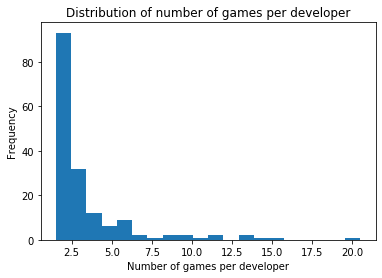

In [47]:
# exploring the number of games released by each developer between 2015-2019
plt.hist(dev_gamecount["count"],align="left",bins=20)
plt.title("Distribution of number of games per developer")
plt.xlabel("Number of games per developer")
plt.ylabel("Frequency")
plt.show()

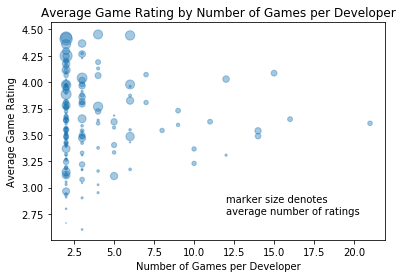

In [45]:
plt.scatter(dev_gamecount["count"],dev_gamecount["mean"],s=dev_gamecount["average rating count"]/10,alpha=0.4)
plt.title("Average Game Rating by Number of Games per Developer")
plt.xlabel("Number of Games per Developer")
plt.ylabel("Average Game Rating")
plt.annotate("marker size denotes\naverage number of ratings",(12,2.75))
plt.savefig("figures/game_developer.png")

In [ ]:
# obtaining the location of each developer's office using google maps
lat=[]
lng=[]

params={
    "inputtype":"textquery",
    "key":g_key,
}

for i in dev_gamecount.index:
    params["input"]=i
    url="https://maps.googleapis.com/maps/api/place/autocomplete/json?parameters"
    response=requests.get(url, params=params).json()
    try:
        place_id=response["predictions"][0]["place_id"]
        url2="https://maps.googleapis.com/maps/api/geocode/json?place_id="+place_id+"&key="+g_key
        response2=requests.get(url2).json()
        lat.append(response2["results"][0]["geometry"]["location"]["lat"])
        lng.append(response2["results"][0]["geometry"]["location"]["lng"])
    except:
        lat.append("missing")
        lng.append("missing")

dev_gamecount["lat"]=lat
dev_gamecount["lng"]=lng
dev_gamecount=dev_gamecount[dev_gamecount["lat"]!="missing"]

lat_dict=dev_gamecount["lat"].to_dict()
lng_dict=dev_gamecount["lng"].to_dict()
developer_df["lat"]= developer_df["first dev"].map(lat_dict)
developer_df["lng"]= developer_df["first dev"].map(lng_dict)
developer_df.head()

In [ ]:
# removing rows without a developer location
developer_df_2=developer_df.dropna(how="any").copy()
developer_df_2.count()

In [ ]:
# getting the top 10 developers by rating
dev_gamecount=dev_gamecount.sort_values("mean",ascending=False)
top_devs_df=dev_gamecount[0:10]
top_devs_df=top_devs_df.reset_index()
top_devs_df["mean"]=round(top_devs_df["mean"],2)
top_devs_df

In [ ]:
# configure gmaps
gmaps.configure(api_key=g_key)

# Use the Lat and Lng as locations
locations=developer_df_2[["lat","lng"]]

# create heatmap
fig = gmaps.figure(center=(20,0),zoom_level=2)
heatmap_layer = gmaps.heatmap_layer(
    locations,
    weights=developer_df_2["rating"],
    dissipating=False,
    max_intensity=50,
    point_radius=3
)
fig.add_layer(heatmap_layer)

In [ ]:
# Add marker layer of top devs over heat map
info_box_template = """
<dl>
<dt>Developer</dt><dd>{first dev}</dd>
<dt>Number of Games</dt><dd>{count}</dd>
<dt>Average Rating</dt><dd>{mean}</dd>
</dl>
"""
dev_info = [info_box_template.format(**row) for index, row in top_devs_df.iterrows()]
locations = top_devs_df[["lat", "lng"]]

markers=gmaps.marker_layer(locations,info_box_content=dev_info)
fig.add_layer(markers)

# Display figure
fig

## Factors affecting game ratings <a id='gamerating'></a>
The next section looks into the factors that may influence game ratings.
Two candidate factors that are considered in this notebook are game platforms and game genre. 
Before diving into the factors, the first step is to examine the two game rating measures - 
1. timing of release
2. user rating
2. metacritic score


The dataset has 2 measures of rating - 
1. user's rating
2. metacritic score (ie the critics)

Correlation coefficient is 0.61
Linear regression model is y = 10.31x + 38.37


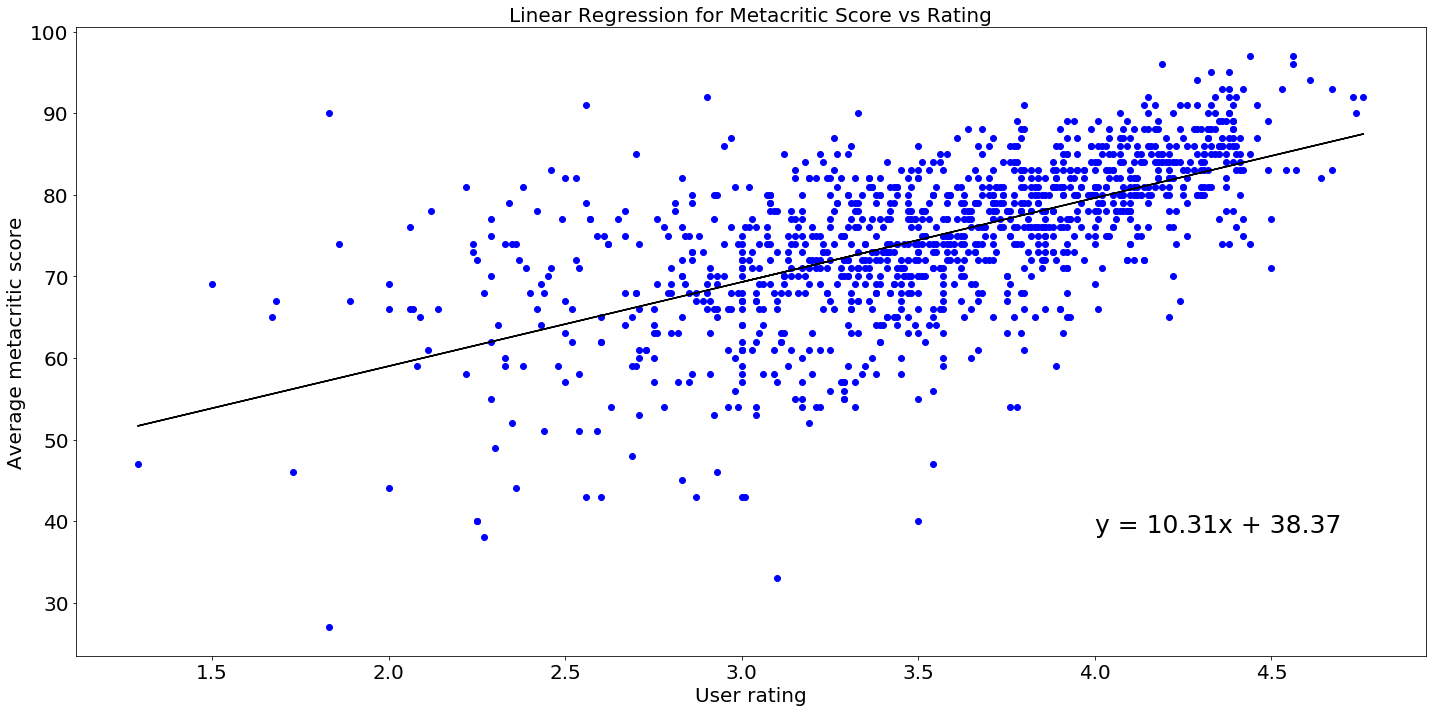

In [76]:
# user rating VS metacritic score
mean_rating = game_df.groupby(["name"])["rating"].mean()
mean_metascore = game_df.groupby(["name"])["metacritic score"].mean()

slope, intercept, rvalue, pvalue, stderror = st.linregress(mean_rating, mean_metascore)
linear = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Correlation coefficient is {round(rvalue,2)}")
print(f"Linear regression model is {linear}")

regression = mean_rating*slope + intercept
plt.figure(figsize=(20,10))
plt.annotate(linear, (4,38.6), fontsize=25, color="black")
plt.scatter(mean_rating, mean_metascore, color='blue')
plt.plot(mean_rating, regression, color="black")
plt.title("Linear Regression for Metacritic Score vs Rating", fontsize=20)
plt.xlabel("User rating", fontsize=20)
plt.ylabel("Average metacritic score", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.savefig("figures/gamerating.png")

In [49]:
# quartiles, outliers and interquartile range for user rating
rating = game_df["rating"]

rating_output =[]
rating_quartiles = rating.quantile([0.25, 0.5, 0.75])

rating_lowerq = rating_quartiles[0.25]
rating_upperq = rating_quartiles[0.75]
rating_iqr = rating_upperq-rating_lowerq
rating_lowerbound = rating_lowerq - (1.5*rating_iqr)
rating_upperbound = rating_upperq + (1.5*rating_iqr)

rating_outlier_count =  game_df.loc[(game_df["rating"] > rating_upperbound)|
                                   (game_df["rating"] < rating_lowerbound)
                               ]["rating"].count()
rating_outlier_vol = game_df.loc[(game_df["rating"] > rating_upperbound)|
                                (game_df["rating"] < rating_lowerbound)
                               ]["rating"].sum()

rating_output.append({"Lower Quartile":rating_lowerq, "Median":rating_quartiles[0.5], "Upper Quartile":rating_upperq, 
               "InterQuartile":rating_iqr, "Lower Bound":rating_lowerbound, "Upper Bound":rating_upperbound, "No. of Outliers":rating_outlier_count})

rating_output_df = pd.DataFrame(rating_output)

rating_output_df['Lower Quartile'] = rating_output_df['Lower Quartile'].map("{:,.2f}".format)
rating_output_df['Median'] = rating_output_df['Median'].map("{:,.2f}".format)
rating_output_df['Upper Quartile'] = rating_output_df['Upper Quartile'].map("{:,.2f}".format)
rating_output_df['InterQuartile'] = rating_output_df['InterQuartile'].map("{:,.2f}".format)
rating_output_df['Lower Bound'] = rating_output_df['Lower Bound'].map("{:,.2f}".format)
rating_output_df['Upper Bound'] = rating_output_df['Upper Bound'].map("{:,.2f}".format)
rating_output_df

,Lower Quartile,Median,Upper Quartile,InterQuartile,Lower Bound,Upper Bound,No. of Outliers
0,3.18,3.57,3.98,0.80,1.98,5.18,9


In [50]:
# quartiles, outliers and interquartile range for meracritic score
metascore = game_df["metacritic score"]

metascore_output =[] 
metascore_quartiles = metascore.quantile([0.25, 0.5, 0.75])

metascore_lowerq = metascore_quartiles[0.25]
metascore_upperq = metascore_quartiles[0.75]
metascore_iqr = metascore_upperq-metascore_lowerq
metascore_lowerbound = metascore_lowerq - (1.5*metascore_iqr)
metascore_upperbound = metascore_upperq + (1.5*metascore_iqr)

metascore_outlier_count =  game_df.loc[(game_df["metacritic score"] > metascore_upperbound)|
                                   (game_df["metacritic score"] < metascore_lowerbound)
                               ]["metacritic score"].count()
metascore_outlier_vol = game_df.loc[(game_df["metacritic score"] > metascore_upperbound)|
                                (game_df["metacritic score"] < metascore_lowerbound)
                               ]["metacritic score"].sum()

metascore_output.append({"Lower Quartile":metascore_lowerq, "Median":metascore_quartiles[0.5], "Upper Quartile":metascore_upperq, 
               "InterQuartile":metascore_iqr, "Lower Bound":metascore_lowerbound, "Upper Bound":metascore_upperbound, "No. of Outliers":metascore_outlier_count})

metascore_output_df = pd.DataFrame(metascore_output)

metascore_output_df['Lower Quartile'] = metascore_output_df['Lower Quartile'].map("{:,.2f}".format)
metascore_output_df['Median'] = metascore_output_df['Median'].map("{:,.2f}".format)
metascore_output_df['Upper Quartile'] = metascore_output_df['Upper Quartile'].map("{:,.2f}".format)
metascore_output_df['InterQuartile'] = metascore_output_df['InterQuartile'].map("{:,.2f}".format)
metascore_output_df['Lower Bound'] = metascore_output_df['Lower Bound'].map("{:,.2f}".format)
metascore_output_df['Upper Bound'] = metascore_output_df['Upper Bound'].map("{:,.2f}".format)
metascore_output_df

,Lower Quartile,Median,Upper Quartile,InterQuartile,Lower Bound,Upper Bound,No. of Outliers
0,70.00,76.00,81.00,11.00,53.50,97.50,28


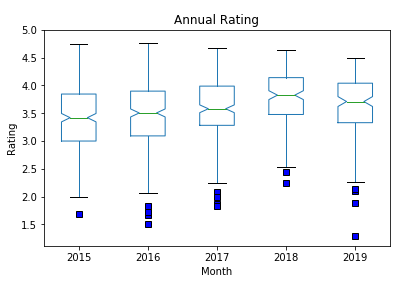

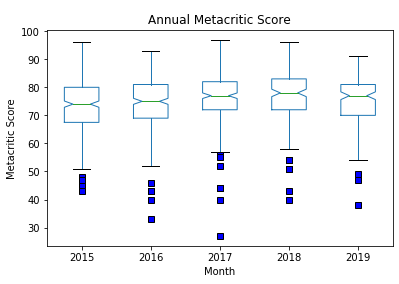

,Type,F Statistic,P Value
0,Metacritic Score,3.829766,4.240497e-03
1,User Rating,13.904115,4.351152e-11


In [51]:
# Generate a box plot for range of user ratings each year
blue_square = dict(markerfacecolor='b', marker='s')
years = game_df["year"].unique()
years.sort()

game_df.boxplot(column=["rating"], by="year", notch = True, 
                 labels = years, grid=False, flierprops=blue_square)

title_boxplot = "Annual Rating"
plt.xlabel("Month")
plt.ylabel("Rating")

plt.title(title_boxplot)
plt.ylim(top = 5)
plt.suptitle(" ")
plt.show()

# Perform ANOVA for user rating
group1 = game_df.loc[game_df["year"] == 2015]["rating"]
group2 = game_df.loc[game_df["year"] == 2016]["rating"]
group3 = game_df.loc[game_df["year"] == 2017]["rating"]
group4 = game_df.loc[game_df["year"] == 2018]["rating"]
group5 = game_df.loc[game_df["year"] == 2019]["rating"]

anova_r = st.f_oneway(group1, group2, group3, group4, group5)

# Generate a box plot for range of metacritic scores each year
game_df.boxplot(column=["metacritic score"], by="year", notch = True, 
                 labels = years, grid=False, flierprops=blue_square)

title_boxplot = "Annual Metacritic Score"
plt.xlabel("Month")
plt.ylabel("Metacritic Score")

plt.title(title_boxplot)
plt.suptitle(" ")
plt.show()

# Perform ANOVA for metacritic score
group6 = game_df[game_df["year"] == 2015]["metacritic score"]
group7 = game_df[game_df["year"] == 2016]["metacritic score"]
group8 = game_df[game_df["year"] == 2017]["metacritic score"]
group9 = game_df[game_df["year"] == 2018]["metacritic score"]
group10 = game_df[game_df["year"] == 2019]["metacritic score"]

anova_m = st.f_oneway(group6, group7, group8, group9, group10)

# Create and show dataframe
fstats = (anova_m[0], anova_r[0])
pstats = (anova_m[1], anova_r[1])
counts = ("Metacritic Score", "User Rating")


frame = {"Type" : counts,"F Statistic": fstats, "P Value" : pstats} 
summary_df = pd.DataFrame(frame)

summary_df

#plt.savefig("figures/gamerating_annualtrend.png")


## Timing of Release <a id='gametiming'></a>

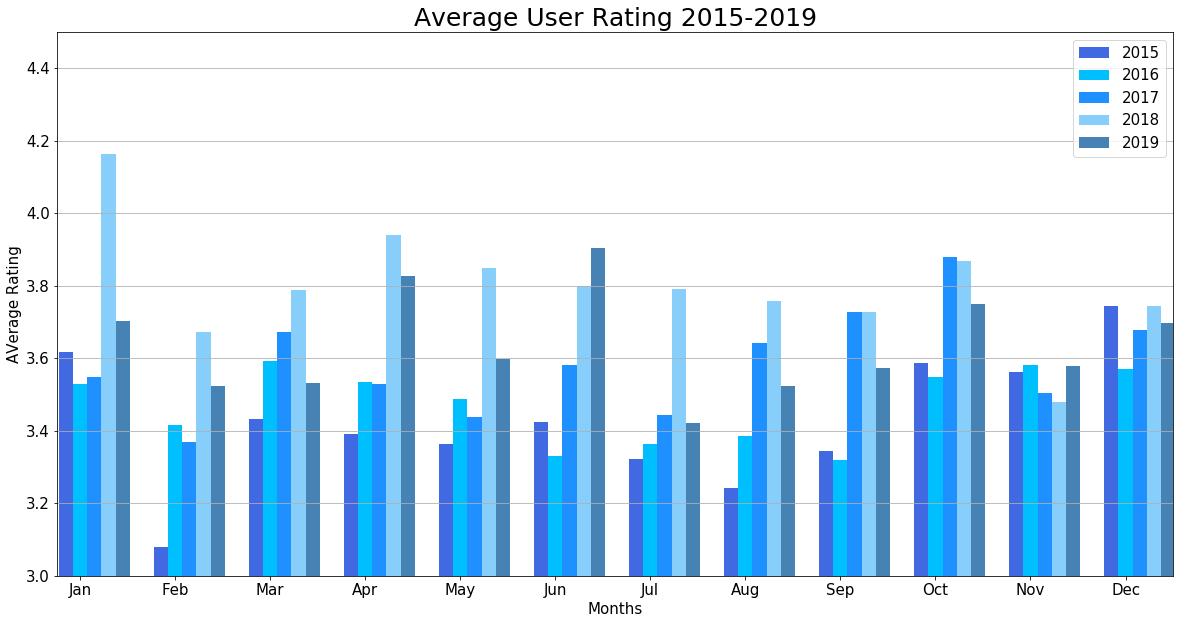

In [80]:
# Average User Rating by Year

# Declare variables for loop
years = game_df["year"].unique()
years.sort()

# Create empty dataframe
mthlyrating_df = pd.DataFrame(0, index=np.arange(len(months)+1), columns=years)

# Populate dataframe
for year in years:  
    current_yr = game_df.loc[game_df["year"] == year]
    mthlyrating_df[year] = pd.DataFrame(current_yr.groupby(["month"])["rating"].mean())

    
# Clean up dataframe
mthlyrating_df = mthlyrating_df.dropna()    
mthlyrating_df["month"] = months
mthlyrating_df = mthlyrating_df[["month", 2015, 2016, 2017, 2018, 2019]]

# Create series for each year in bar plot
index = np.arange(12)
rating1 = mthlyrating_df[2015]
rating2 = mthlyrating_df[2016]
rating3 = mthlyrating_df[2017]
rating4 = mthlyrating_df[2018]
rating5 = mthlyrating_df[2019]

# Create plot
fig, ax = plt.subplots(figsize = (20,10))
ax.grid(b=True, which='major', axis='y')

# Plot bars for each year
year1 = ax.bar(index, rating1, 0.15, label="2015", color = "royalblue")
year2 = ax.bar(index + 0.15, rating2, 0.15, label="2016", color = "deepskyblue")
year3 = ax.bar(index + 0.30, rating3, 0.15, label="2017", color= "dodgerblue" )
year4 = ax.bar(index + 0.45, rating4, 0.15, label="2018", color= "lightskyblue")
year5 = ax.bar(index + 0.60, rating5, 0.15, label="2019", color= "steelblue")

plt.title("Average User Rating 2015-2019",fontsize=25)

plt.xlabel('Months',fontsize=15)
plt.ylabel('AVerage Rating',fontsize=15)

plt.xticks(index + 0.15, months,fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(-.09,11.65)
plt.ylim(3,4.5)

plt.legend(fontsize=15)

plt.show()

Looking at a comparison of game release timing and user ratings, for all years, games released in the last few months of the year (Oct-Dec) tend to rate higher than those released in earlier months

In [84]:
#  Generate summary statistics for mean, median, variance, standard deviation, and SEM for monthly ratings
means = game_df.groupby(["month"])["rating"].mean()
medians = game_df.groupby(["month"])["rating"].median()
stds = game_df.groupby(["month"])["rating"].std()
vars = game_df.groupby(["month"])["rating"].var()
sems = game_df.groupby(["month"])["rating"].sem()

# Create dataframe
frame = {"Month": months, "Mean": means, "Median": medians, "Std Dev": stds,"Variance": vars,"SEM": sems} 
summary = pd.DataFrame(frame) 

# Reformat output for display
summary["Mean"] = summary['Mean'].map("{:,.2f}".format)
summary["Median"] = summary["Median"].map("{:,.2f}".format)
summary["Std Dev"] = summary["Std Dev"].map("{:,.2f}".format)
summary["Variance"] = summary["Variance"].map("{:,.2f}".format)
summary["SEM"] = summary["SEM"].map("{:,.2f}".format)

print(summary)


      Month  Mean Median Std Dev Variance   SEM
month                                          
1       Jan  3.64   3.76    0.59     0.35  0.07
2       Feb  3.40   3.50    0.65     0.42  0.06
3       Mar  3.59   3.67    0.55     0.31  0.05
4       Apr  3.55   3.54    0.58     0.34  0.06
5       May  3.51   3.52    0.59     0.35  0.05
6       Jun  3.55   3.58    0.53     0.28  0.06
7       Jul  3.42   3.41    0.56     0.31  0.06
8       Aug  3.48   3.50    0.56     0.31  0.05
9       Sep  3.49   3.44    0.58     0.34  0.05
10      Oct  3.68   3.77    0.52     0.27  0.05
11      Nov  3.55   3.57    0.52     0.28  0.06
12      Dec  3.68   3.77    0.48     0.23  0.06


Taking a look at some descriptive statistics, the central tendency measures (median and mean) show the dataset has a symmetrical distribution ie the data is not 'badly' skewed.  The measures of variabiity, being the variance and standard deviation also show the spread of ratings is smaller in the last 3 months of the year

## Game platforms <a id='gameplatform'></a>

## Game genres <a id='gamegenre'></a>

In [ ]:
# get the first genre of each game (treated as the main genre for further analysis)
genre=[]
for i in game_df.index:
    curr_genre=game_df.loc[i,"genres"].split("'")
    genre.append(curr_genre[1])

game_df["first genre"]=genre
game_df.head()

In [ ]:
# explore summary of rating by genre

genre_summary=pd.DataFrame(game_df.groupby("first genre")["rating"].agg(["count","mean","median","var","std","sem"]))
genre_summary

In [ ]:
# only examining genre that have at list 100 ratings
top_genre=genre_summary.index[genre_summary["count"]>100]
for i in game_df.index:
    if game_df.loc[i,"first genre"] in top_genre:
        game_df.loc[i,"top genre"]=True
    else:
        game_df.loc[i,"top genre"]=False

# get a shortened genre_df with only the top genres
game_df_shortgenre=game_df[game_df["top genre"]==True]
game_df_shortgenre

In [ ]:
# visualising distribution of game rating in the top genres
game_df_shortgenre.boxplot("rating",by="first genre",figsize=(10,3),grid=False,\
                       notch=True,color="black",\
                       flierprops=dict(marker='x',markersize=7, markeredgecolor="red"))
plt.title("Box Plot of Average Game Rating by Genre",fontweight="bold")
plt.xlabel("Game Genre", fontweight="bold")
plt.ylabel("Average Game Rating", fontweight="bold")
plt.suptitle(" ")

plt.savefig("figures/gamerating_genre.png")

In [ ]:
# one way anova across genre
rating=[]
curr_rating=[]
genre=[]

for i in game_df_shortgenre["first genre"].unique():
    curr_rating=game_df_shortgenre["rating"][game_df_shortgenre["first genre"]==i]
    rating.append(curr_rating)
    genre.append(i)

st.f_oneway(rating[0],rating[1],rating[2],rating[3])

The ANOVA was significant with a p-value of <0.001, suggesting that average game ratings do differ by game genre. As such, individual t-tests will be run across each pair of genres to find out which pair are driving the results. Alpha level is set at p=0.05/(number of tests) to control for multiple comparisons

In [ ]:
numtests=0
for i in range(len(genre)-1):
    numtests=numtests+(i+1)

for i in range(len(genre)):
    for j in range(len(genre)):
        if genre[i]!=genre[j]:
            result=st.ttest_ind(rating[i],rating[j],equal_var=False)
            if result.pvalue<(0.05/numtests):
                print(genre[i]+" vs "+genre[j]+" - "+str(result))

In [ ]:
# plotting finding
import seaborn as sns

sns.set(style="whitegrid")
sns.despine()
fig1=sns.swarmplot("first genre","rating", data=game_df_shortgenre,size=3)
fig1=sns.boxplot("first genre","rating", data=game_df_shortgenre,color="white")
fig1.set_title("Average game rating by genre",fontweight="bold")
fig1.text(3.6,4,"Adventure > Indie\nAdventure > Strategy\np-value=.00898", horizontalalignment="left", size="medium", color='black')

plt.savefig("figures/gamerating_genre2.png")

The t-tests show that adventure genre tend to be rated higher than indie genre or strategy genre games.
The above analyses were rerun without outliers (below) and demonstrate a similar results, suggesting that significant difference in rating between genre is likely sound.

In [ ]:
# testing whether results will be similar without outliers
game_df_shortgenre_nooutlier=g=game_df_shortgenre.copy()

for i in game_df_shortgenre["first genre"].unique():
    Q1=game_df_shortgenre["rating"][game_df_shortgenre["first genre"]==i].quantile(.25)
    Q3=game_df_shortgenre["rating"][game_df_shortgenre["first genre"]==i].quantile(.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    for j in game_df_shortgenre_nooutlier.index:
        if (game_df_shortgenre_nooutlier.loc[j,"first genre"]==i) & (game_df_shortgenre_nooutlier.loc[j,"rating"]<lower_bound):
            game_df_shortgenre_nooutlier.loc[j,"outlier"]=True

game_df_shortgenre_nooutlier=game_df_shortgenre_nooutlier[game_df_shortgenre_nooutlier["outlier"]!=True]

game_df_shortgenre_nooutlier.boxplot("rating",by="first genre",figsize=(10,3),grid=False,\
                       notch=True,color="black",\
                       flierprops=dict(marker='x',markersize=7, markeredgecolor="red"))
plt.title("Box Plot of Average Game Rating by Genre (without outliers)",fontweight="bold")
plt.xlabel("Game Genre", fontweight="bold")
plt.ylabel("Average Game Rating", fontweight="bold")
plt.suptitle(" ")

rating_nooutlier=[]
curr_rating=[]
genre_nooutlier=[]

for i in game_df_shortgenre_nooutlier["first genre"].unique():
    curr_rating=game_df_shortgenre_nooutlier["rating"][game_df_shortgenre_nooutlier["first genre"]==i]
    rating_nooutlier.append(curr_rating)
    genre_nooutlier.append(i)

st.f_oneway(rating_nooutlier[0],rating_nooutlier[1],rating_nooutlier[2],rating_nooutlier[3])

In [ ]:
# to further explore how rating across genre differ over time, the following visualisations and linear regressions were run in the top 4 genres

fig, ax = plt.subplots()
for genre, group in game_df_shortgenre.groupby("first genre"):
    plt.scatter(group["release date"], group["rating"],alpha=0.4,label=genre)
ax.legend()
ax.set_title("Trend in game rating by genre between 2015-2020")

game_df["ordtime"]=game_df["release date"].map(dt.datetime.toordinal)

for i in game_df_shortgenre["first genre"].unique():
    (slope,intercept,rval,pval,stderror)=st.linregress(game_df["ordtime"][game_df["first genre"]==i],game_df["rating"][game_df["first genre"]==i])
    if pval<0.05/4:
        print(f'{i} - y={round(slope,4)}x{round(intercept,4)}')
        game_df[i]=slope*game_df["ordtime"][game_df["first genre"]==i]+intercept
        
plt.plot(game_df["release date"],game_df["Indie"],marker="",color="green",alpha=0.5)
plt.plot(game_df["release date"],game_df["Strategy"],marker="",color="darkred",alpha=0.5)

plt.savefig("figures/gamerating_genre_trend.png")